
Столбцы: Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Первые строки данных:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603   

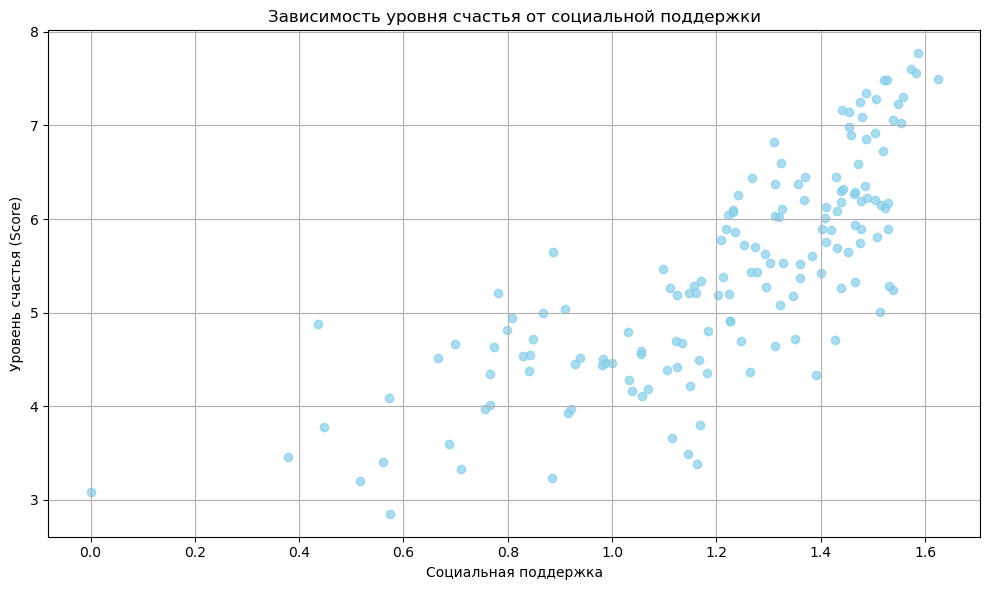

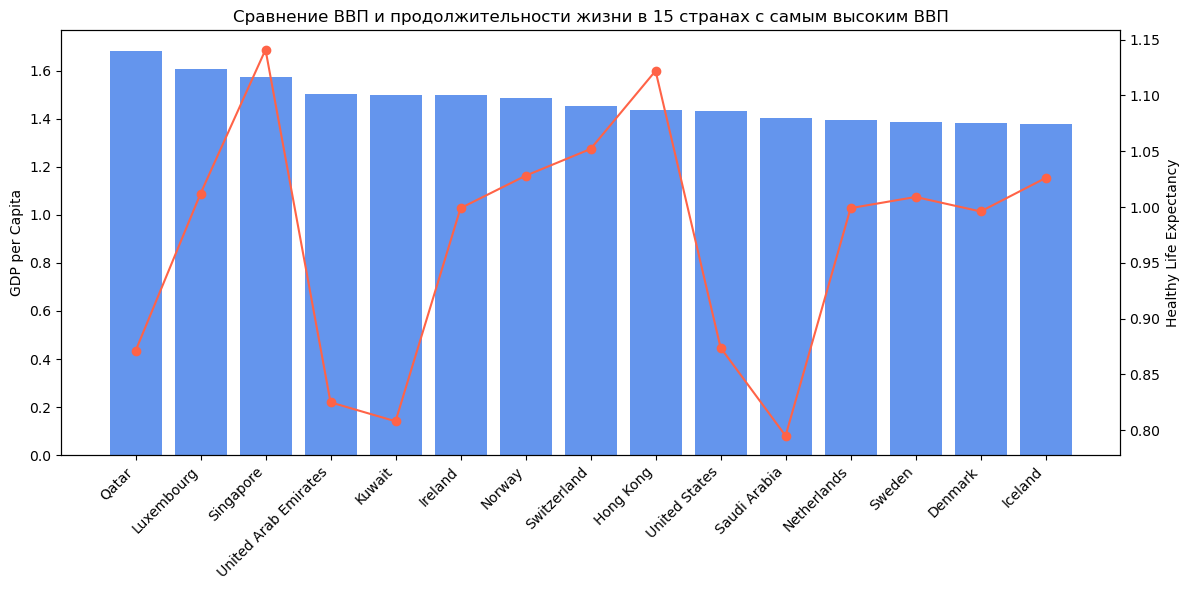

In [2]:
# Daily Challenge: World Happiness Report Analysis

import os
import pandas as pd
import matplotlib.pyplot as plt

# Устанавливаем рабочую директорию
os.chdir(r"C:\DI-Bootcamp\Week3\Day4\DailyChallenge")

# Загружаем данные за 2019 год
file_path = "2019.csv"
df = pd.read_csv(file_path)

# Просмотр структуры данных
print("\nСтолбцы:", df.columns)
print("\nПервые строки данных:")
print(df.head())

# Переименование столбцов для удобства, если необходимо
# df.rename(columns={'Country or region': 'Country'}, inplace=True)

# Удалим строки с пропущенными значениями
df.dropna(inplace=True)

# --- Часть 1: Влияние социальной поддержки на уровень счастья ---
plt.figure(figsize=(10, 6))
plt.scatter(df['Social support'], df['Score'], alpha=0.7, color='skyblue')
plt.title('Зависимость уровня счастья от социальной поддержки')
plt.xlabel('Социальная поддержка')
plt.ylabel('Уровень счастья (Score)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Часть 2: Сравнение ВВП и продолжительности жизни по регионам ---
# Для этого добавим фиктивный столбец 'Region' или используем 'Country' как категорию
# Здесь для примера разобьём по группам вручную (в реальной задаче лучше использовать файл с регионами)

# Группировка по странам (или предполагаемым регионам)
df_sorted = df.sort_values(by='GDP per capita', ascending=False).head(15)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбчатая диаграмма для GDP
ax1.bar(df_sorted['Country or region'], df_sorted['GDP per capita'], color='cornflowerblue', label='GDP per Capita')
ax1.set_ylabel('GDP per Capita')
ax1.set_xticks(range(len(df_sorted)))
ax1.set_xticklabels(df_sorted['Country or region'], rotation=45, ha='right')

# Линейный график для Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(df_sorted['Country or region'], df_sorted['Healthy life expectancy'], color='tomato', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy')

# Заголовок и легенда
plt.title('Сравнение ВВП и продолжительности жизни в 15 странах с самым высоким ВВП')
fig.tight_layout()
plt.show()
